<a href="https://colab.research.google.com/github/HumbertoJRR/Precticas/blob/main/Clasificacion_de_valor_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos las librerias

In [1]:
#Importamos las librerias que se utilizaran
import numpy as np # linear algebra
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from pylab import rcParams
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

# Leemos y analizamos nuestra base

In [2]:
#Leemos la base
CLV=pd.read_csv('/content/CLV-Clasificacion.csv')
CLV.head(5)

,ID,CLV,Ingresos,Monthly Premium Auto,Meses ultima reclamacion,Meses desde incio de la poliza,Num quejas abiertas,Numero de polizas,Importe total de la reclamacion,Response,cobertura,Educacion,Estatus de empleo,Genero,Location Code,Estatus marital,tipo de poliza,clase de vehiculo,Clasificacion
0,FQ61281,83325.38119,58958,231,31,74,0,2,1108.800000,No,Extended,High School or Below,Employed,M,Suburban,Married,Personal Auto,Luxury Car,Alto
1,YC54142,74228.51604,0,242,1,34,0,2,1742.400000,No,Extended,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Luxury Car,Alto
2,BP23267,73225.95652,39547,202,11,21,0,2,969.600000,No,Extended,Bachelor,Employed,F,Suburban,Married,Personal Auto,Luxury SUV,Alto
3,KH55886,67907.27050,78310,192,34,18,1,2,151.711475,No,Premium,Bachelor,Employed,M,Rural,Married,Personal Auto,Sports Car,Alto
4,SK66747,66025.75407,33481,188,28,46,0,2,1194.892002,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Luxury SUV,Alto


In [3]:
#Los nombres de las columnas son los siguientes
CLV.columns

Index(['ID', 'CLV', 'Ingresos', 'Monthly Premium Auto',
       'Meses ultima reclamacion', 'Meses desde incio de la poliza',
       'Num quejas abiertas', 'Numero de polizas',
       'Importe total de la reclamacion', 'Response', 'cobertura', 'Educacion',
       'Estatus de empleo', 'Genero', 'Location Code', 'Estatus marital',
       'tipo de poliza', 'clase de vehiculo', 'Clasificacion'],
      dtype='object')

In [4]:
#Revisamos la cantidad de filas y columnas que tiene nuestro dataset
CLV.shape

(9134, 19)

#Limpianos nuestro dataset

In [5]:
#Eliminamos el numero de cliente ya que no aporta nada para nuestro modelo de prediccion
CLV=CLV.drop(['ID'], axis=1)

In [6]:
#Revisamos los valores nulos
CLV.isnull().sum()

CLV                                0
Ingresos                           0
Monthly Premium Auto               0
Meses ultima reclamacion           0
Meses desde incio de la poliza     0
Num quejas abiertas                0
Numero de polizas                  0
Importe total de la reclamacion    0
Response                           0
cobertura                          0
Educacion                          0
Estatus de empleo                  0
Genero                             0
Location Code                      0
Estatus marital                    0
tipo de poliza                     0
clase de vehiculo                  0
Clasificacion                      0
dtype: int64

No se tiene ningun registro nulo

In [7]:
#Revisamos los valores unicos
CLV.nunique()

CLV                                8041
Ingresos                           5694
Monthly Premium Auto                202
Meses ultima reclamacion             36
Meses desde incio de la poliza      100
Num quejas abiertas                   6
Numero de polizas                     9
Importe total de la reclamacion    5106
Response                              2
cobertura                             3
Educacion                             5
Estatus de empleo                     5
Genero                                2
Location Code                         3
Estatus marital                       3
tipo de poliza                        3
clase de vehiculo                     6
Clasificacion                         3
dtype: int64

In [8]:
#Analizamos los valores duplicados
CLV.duplicated().sum()

861

In [9]:
#Eliminamos los valores duplicados
CLV=CLV.drop_duplicates()

In [10]:
#Confirmamos que los valores duplicados estan eliminados
CLV.duplicated().sum()

0

In [11]:
#Deriving living situation by marital status"Alone"
CLV["Estatus marital"]=CLV["Estatus marital"].replace({"Married":"Partner", "Divorced":"Alone", "Single":"Alone",})

In [12]:
#Segmenting education levels in three groups
CLV["Educacion"]=CLV["Educacion"].replace({"High School or Below":"Undergraduate","Bachelor":"Undergraduate", "College":"Graduate", "Master":"Postgraduate", "Doctor":"Postgraduate"})

In [13]:
#Segmentos el estatus de empleo en tres segmentos
CLV["Estatus de empleo"]=CLV["Estatus de empleo"].replace({"Medical Leave":"Retired","Disabled":"Employed"})

# Vizualizacion grafica de nuestros datos

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Estatus de empleo')

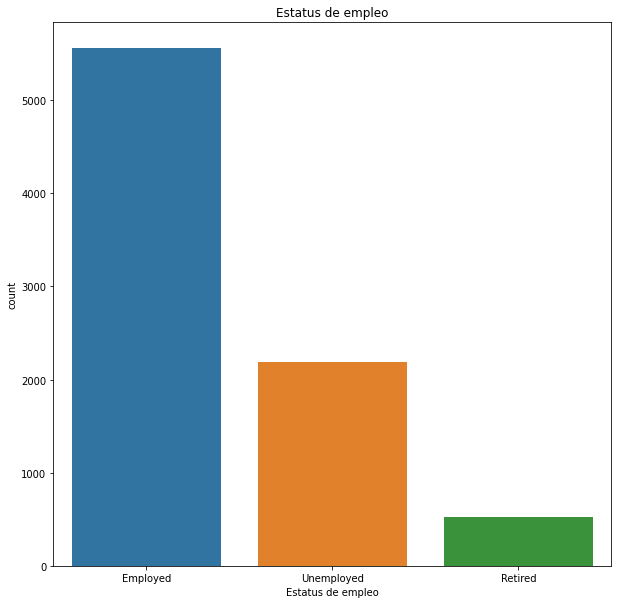

In [ ]:
#Estatus de empleo
sns.countplot(CLV['Estatus de empleo'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Estatus de empleo')

La mayoria de los clientes cuentan con empleo

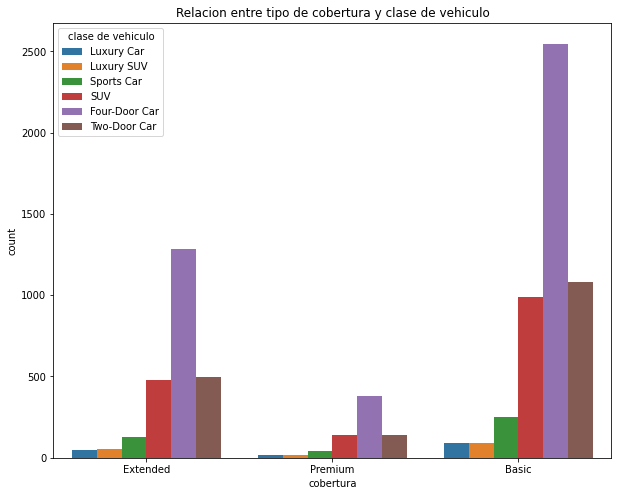

In [ ]:
#Veamos la relacion entre el tipo de auto y el tipo de cobertura
plt.figure(figsize=(10,8))
sns.countplot(x='cobertura',hue='clase de vehiculo',data=CLV)
plt.title('Relacion entre tipo de cobertura y clase de vehiculo')
plt.show()

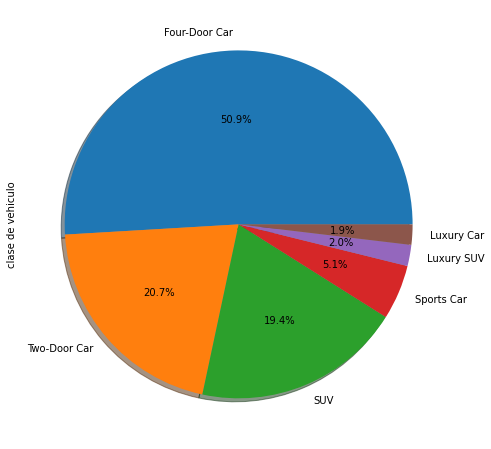

In [ ]:
#Grafico de Pie de la distribucion de los tipos de vehiculos
CLV['clase de vehiculo'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

La mitad de los clientes tienen un auto de 4 puertas, seguido con el 20% que tienen un vehiculo de 2 puertas

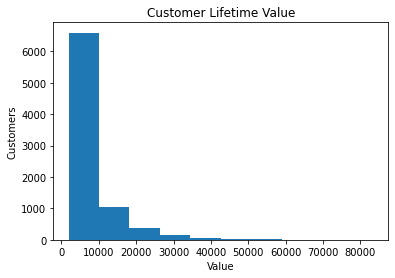

In [ ]:
#Graico de CLV por clientes
plt.hist(CLV['CLV'], bins = 10)
plt.title("Customer Lifetime Value") #Assign title 
plt.xlabel("Value") #Assign x label 
plt.ylabel("Customers") #Assign y label 
plt.show()

El CLV suele estar entre los 2000 y los 9000, se analizaran los valores mayores para determinar si se trata de outliers

#Analisis estadistico

In [ ]:
#Analizamos los datos
CLV.describe()

,CLV,Ingresos,Monthly Premium Auto,Meses ultima reclamacion,Meses desde incio de la poliza,Num quejas abiertas,Numero de polizas,Importe total de la reclamacion
count,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000
mean,8023.748192,37622.867521,93.057537,15.128128,48.029131,0.386559,2.977880,432.283180
std,6930.950731,30651.511325,34.173819,10.101816,27.980979,0.910381,2.386215,294.789885
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4004.551300,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,259.006614
50%,5800.772699,34115.000000,83.000000,14.000000,48.000000,0.000000,2.000000,379.200000
75%,8935.034140,62464.000000,109.000000,23.000000,72.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Vemos una direfencia muy grande entre el 3er cuartil y el ultimo por lo que nos podria indicar que contamos con outliers en la variable CLV

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


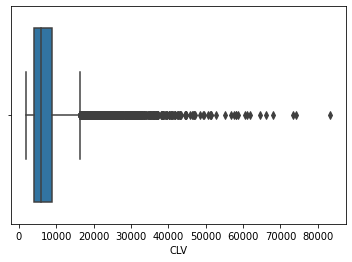

In [ ]:
#Graficamos el boxplot de nuestra variable CLV
sns.boxplot(CLV['CLV'])

De la boxplot observamos que los valores outliers parecen ser los mayores de 18 mil asi que veamos cuantos de los datos tienen un CLV mayor a 18 mil

In [14]:
outliers = CLV[CLV['CLV'] >= 18000]
len(outliers)

632

De los 8300 son 632 valores los que superan un CLV de 18 mil, estos valores parecen fuera de proporcion por lo que seran eliminados para no afectar las clasificaciones del modelo

In [15]:
CLV.drop(CLV[(CLV['CLV'] >18000)].index, inplace=True)

In [16]:
#Eliminamos la columna clv ya que tiene alta correlacion con nuestra variable respuesta "clasificacion" 
#ya que en base a esta se realizaron las clasificaciones
CLV=CLV.drop(['CLV'], axis=1)

In [17]:
#Vizualizamos cuales son nuestras variables categoricas
s = (CLV.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Response', 'cobertura', 'Educacion', 'Estatus de empleo', 'Genero', 'Location Code', 'Estatus marital', 'tipo de poliza', 'clase de vehiculo', 'Clasificacion']


In [18]:
#Label Encoding transformamos nuestras variables categoricas en varibles numericas
LE=LabelEncoder()
for i in object_cols:
    CLV[i]=CLV[[i]].apply(LE.fit_transform)

In [19]:
CLV.head(4)

,Ingresos,Monthly Premium Auto,Meses ultima reclamacion,Meses desde incio de la poliza,Num quejas abiertas,Numero de polizas,Importe total de la reclamacion,Response,cobertura,Educacion,Estatus de empleo,Genero,Location Code,Estatus marital,tipo de poliza,clase de vehiculo,Clasificacion
689,80991,223,5,56,0,4,937.327881,0,1,2,0,0,2,1,1,2,0
690,0,70,15,44,0,2,504.000000,0,0,2,2,0,1,0,1,0,0
691,21708,68,28,77,0,2,326.400000,0,0,0,1,0,1,0,1,0,0
692,55437,64,5,78,1,2,445.287788,0,0,0,0,1,1,1,1,0,0


In [ ]:
%pip install Fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for Fitter: filename=fitter-1.5.2-py3-none-any.whl size=25609 sha256=b1b437645d5bc123a56722d13f5ae16c81f5b6ebc157eb5ce26bf39949692d74
  Stored in directory: /root/.cache/pip/wheels/8e/6b/cb/628035771acab95dc84f200590b4838c7c3095a70ede67a25a
Successfully built Fitter


In [ ]:
#Analizamos la distribucion de nuestros datos
from fitter import Fitter, get_common_distributions
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(CLV.Clasificacion, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

Fitting 9 distributions: 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,771.875137,242.522127,-17480.929110,inf,0.544530,0.0
exponpow,979.977934,248.565323,-15665.908235,inf,0.375130,0.0
powerlaw,980.711696,157.453298,-15660.189149,inf,0.544562,0.0
chi2,990.369876,269.950595,-15585.307680,inf,0.435250,0.0
logistic,990.549648,231.384429,-15592.862091,inf,0.312332,0.0
norm,990.827971,213.810295,-15590.715440,inf,0.340335,0.0
gamma,991.257984,214.598114,-15578.458729,inf,0.336704,0.0
expon,994.928308,212.536614,-15559.159989,inf,0.335709,0.0
cauchy,1009.750838,8500.335748,-15446.163337,inf,0.500000,0.0


In [ ]:
# Correlación entre columnas numéricas
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = CLV.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
170,Estatus de empleo,Ingresos,-0.780190,0.780190
10,Ingresos,Estatus de empleo,-0.780190,0.780190
103,Importe total de la reclamacion,Monthly Premium Auto,0.603737,0.603737
23,Monthly Premium Auto,Importe total de la reclamacion,0.603737,0.603737
137,cobertura,Monthly Premium Auto,0.458955,0.458955
25,Monthly Premium Auto,cobertura,0.458955,0.458955
112,Importe total de la reclamacion,Estatus de empleo,0.376589,0.376589
176,Estatus de empleo,Importe total de la reclamacion,0.376589,0.376589
102,Importe total de la reclamacion,Ingresos,-0.373154,0.373154
6,Ingresos,Importe total de la reclamacion,-0.373154,0.373154


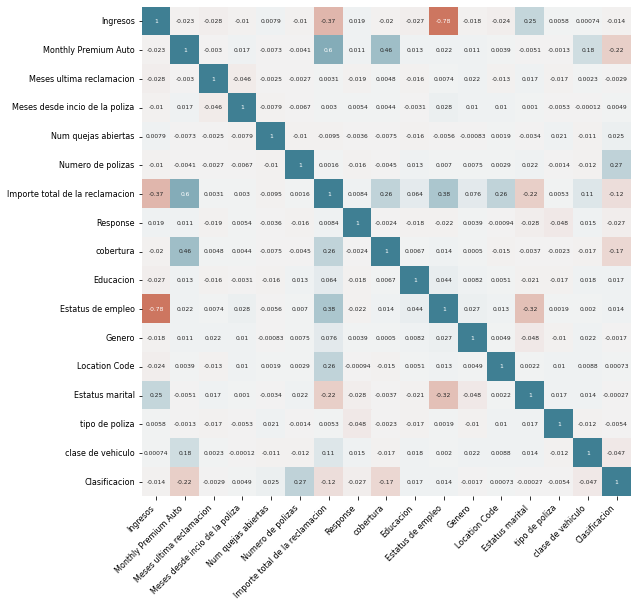

In [ ]:
# Heatmap matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 9))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [ ]:
#Analizamos un modelo de regresion multiple para nuestras variables
y= CLV['Clasificacion'] #the column we want to predict 
x= CLV.drop(labels = ['Clasificacion'], axis = 1)  #independent columns 

In [ ]:
import statsmodels.api as sm
ks = sm.OLS(y,x)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Clasificacion   R-squared (uncentered):                   0.760
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              1507.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):                        0.00
Time:                        04:29:52   Log-Likelihood:                         -8814.8
No. Observations:                7641   AIC:                                  1.766e+04
Df Residuals:                    7625   BIC:                                  1.777e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Ingresos                         5.844e-06   4.18e-07     13.991      0.000    5.03e-06    6.66e-06
Monthly Premium Auto                0.0005      0.000      1.441      0.150      -0.000       0.001
Meses ultima reclamacion            0.0071      0.001      8.519      0.000       0.005       0.009
Meses desde incio de la poliza      0.0028      0.000      9.242      0.000       0.002       0.003
Num quejas abiertas                 0.0430      0.009      4.533      0.000       0.024       0.062
Numero de polizas                   0.1069      0.004     30.528      0.000       0.100       0.114
Importe total de la reclamacion    -0.0001   4.87e-05     -2.797      0.005      -0.000   -4.08e-05
Response                            0.0084      0.039      0.215      0.829      -0.068       0.084
cobertura                          -0.1476      0.015     -9.663      0.000      -0.177      -0.118
Educacion                           0.0836      0.010      8.711      0.000       0.065       0.102
Estatus de empleo                   0.2318      0.015     15.810      0.000       0.203       0.260
Genero                              0.0788      0.017      4.520      0.000       0.045       0.113
Location Code                       0.1238      0.015      8.435      0.000       0.095       0.153
Estatus marital                     0.1167      0.019      6.245      0.000       0.080       0.153
tipo de poliza                      0.1391      0.017      8.010      0.000       0.105       0.173
clase de vehiculo                   0.0005      0.004      0.110      0.913      -0.008       0.009
==============================================================================
Omnibus:                      512.996   Durbin-Watson:                   0.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.934
Skew:                          -0.687   Prob(JB):                    4.85e-134
Kurtosis:                       2.803   Cond. No.                     2.15e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El modelo un buen r cuadrada ajustada de 76% por lo que analizaremos un modelo de aprendizaje automatico mas regresion lineal para ver los resultados

# Modelos de clasificacion

In [20]:
#Primero analizamos la variable respuesta
print(pd.value_counts(CLV['Clasificacion'], sort = True))

2    4161
1    2066
0    1414
Name: Clasificacion, dtype: int64


observamos que nuestros datos esta desbalanceados por lo que es necesarios un balanceo para evitar sesgo en nuestros modelos de clasificacion

In [21]:
#dividimos la variable dependiente de las independientes
X = CLV.drop(['Clasificacion'], axis=1) # independientes
y = CLV.Clasificacion # variable respuesta

**Escalamos las variables**

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [23]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [24]:
#Analizamos un modelo de regresion logistica que autobalancea 
from sklearn.linear_model import LogisticRegression
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

In [25]:
model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)

In [26]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, pred_y)
cnf_matrix

array([[299,   0,  85],
       [  0, 523,   1],
       [207,  71, 725]])

Text(0.5, 257.44, 'Predicted label')

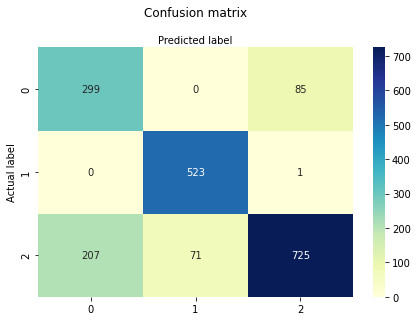

In [27]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
precision = metrics.accuracy_score(pred_y, y_test) * 100
precision

80.95238095238095

Este modelo de regresion logistica que balancea los datos tiene un buen desempeño en la clasificacion de los clientes tiene una preciosion del 80%

In [31]:
from sklearn.metrics import classification_report
target_names = ['Alta', 'Baja','Media']
print(classification_report(y_test, pred_y, target_names=target_names))

              precision    recall  f1-score   support

        Alta       0.59      0.78      0.67       384
        Baja       0.88      1.00      0.94       524
       Media       0.89      0.72      0.80      1003

    accuracy                           0.81      1911
   macro avg       0.79      0.83      0.80      1911
weighted avg       0.83      0.81      0.81      1911



Ahora utilizaremos under sampling para balancear nuestros datos y comparar el desempeño del modelo anterior con otros algoritmos de aprendizaje automatico

In [53]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 1030, 1: 1030, 2: 1030})
Testing target statistics: Counter({2: 1003, 1: 524, 0: 384})


In [54]:
# Comparemos el desempeño de la regresion logistica con los resultados del modelo anterior
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_res, y_res)

y_pred = logreg.predict(X_test)

In [57]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[304,   0,  80],
       [  2, 521,   1],
       [214,  77, 712]])

Text(0.5, 257.44, 'Predicted label')

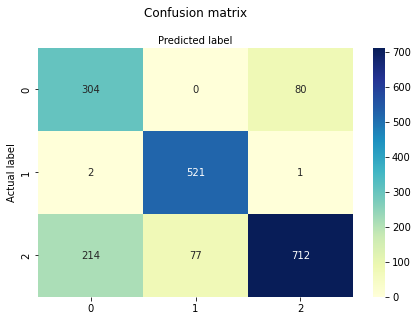

In [58]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
from sklearn.metrics import classification_report
target_names = ['Alta', 'Baja','Media']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Alta       0.58      0.79      0.67       384
        Baja       0.87      0.99      0.93       524
       Media       0.90      0.71      0.79      1003

    accuracy                           0.80      1911
   macro avg       0.78      0.83      0.80      1911
weighted avg       0.83      0.80      0.81      1911



In [60]:
precision = metrics.accuracy_score(y_pred, y_test) * 100
precision

80.429094714809

Observamos que el desempeño del algoritmo es similar en comparacion con la regresion logistica que balancea los datos en el mismo proceso

In [61]:
#K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#entremos el modelo
knn.fit(X_res, y_res)

y_pred = knn.predict(X_test)

precision = metrics.accuracy_score(y_pred, y_test) * 100
precision

53.68916797488226

In [63]:
from sklearn.metrics import classification_report
target_names = ['Alta', 'Baja','Media']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Alta       0.35      0.69      0.46       384
        Baja       0.53      0.73      0.62       524
       Media       0.87      0.38      0.53      1003

    accuracy                           0.54      1911
   macro avg       0.58      0.60      0.54      1911
weighted avg       0.67      0.54      0.54      1911



La presicion con KNN es mala en comparacion del primer modelo

In [64]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#entremos el modelo
gnb.fit(X_res, y_res)

y_pred = gnb.predict(X_test)

precision = metrics.accuracy_score(y_pred, y_test) * 100
precision

76.87074829931973

In [65]:
from sklearn.metrics import classification_report
target_names = ['Alta', 'Baja','Media']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Alta       0.49      0.66      0.56       384
        Baja       0.93      0.93      0.93       524
       Media       0.84      0.73      0.78      1003

    accuracy                           0.77      1911
   macro avg       0.75      0.77      0.76      1911
weighted avg       0.79      0.77      0.78      1911



Con Naive bayes la presicion es buena pero la regresion logistica muestra un desempeño un poco mejor

In [66]:
#Maquina de soporte vectorial
from sklearn.svm import SVC
svm = SVC(kernel='linear')

#entremos el modelo
svm.fit(X_res, y_res)

y_pred = svm.predict(X_test)

precision = metrics.accuracy_score(y_pred, y_test) * 100
precision

78.07430664573522

In [67]:
target_names = ['Alta', 'Baja','Media']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Alta       0.50      0.84      0.63       384
        Baja       0.93      0.93      0.93       524
       Media       0.92      0.68      0.78      1003

    accuracy                           0.78      1911
   macro avg       0.78      0.82      0.78      1911
weighted avg       0.84      0.78      0.79      1911



El desempeño es practicamente el mismo que Naive bayes

In [68]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

tre = DecisionTreeClassifier()

#entremos el modelo
tre.fit(X_res, y_res)

y_pred = tre.predict(X_test)

precision = metrics.accuracy_score(y_pred, y_test) * 100
precision

92.56933542647829

In [69]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[358,   0,  26],
       [  0, 515,   9],
       [ 97,  10, 896]])

Text(0.5, 257.44, 'Predicted label')

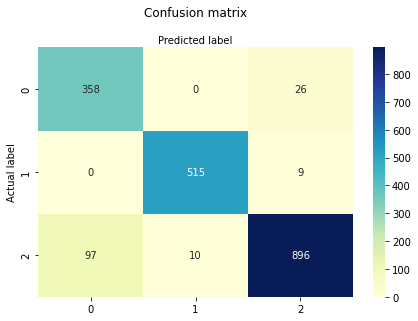

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [71]:
from sklearn.metrics import classification_report
target_names = ['Alta', 'Baja','Media']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Alta       0.79      0.93      0.85       384
        Baja       0.98      0.98      0.98       524
       Media       0.96      0.89      0.93      1003

    accuracy                           0.93      1911
   macro avg       0.91      0.94      0.92      1911
weighted avg       0.93      0.93      0.93      1911



Observamos un gran desempeño del algoritmo de desicion tree comparemos con los restantes para ver si es el mejor modelo para nuestros datos

In [72]:
#Randomforest
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators=100)

#entremos el modelo
rdf.fit(X_res, y_res)

y_pred = rdf.predict(X_test)

precision = metrics.accuracy_score(y_pred, y_test) * 100
precision

92.62166405023548

In [73]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[372,   0,  12],
       [  0, 514,  10],
       [111,   8, 884]])

Text(0.5, 257.44, 'Predicted label')

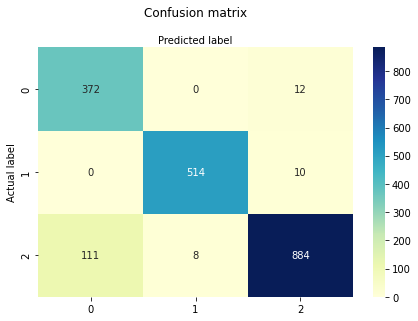

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [75]:
from sklearn.metrics import classification_report
target_names = ['Alta', 'Media','Baja']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Alta       0.77      0.97      0.86       384
       Media       0.98      0.98      0.98       524
        Baja       0.98      0.88      0.93      1003

    accuracy                           0.93      1911
   macro avg       0.91      0.94      0.92      1911
weighted avg       0.94      0.93      0.93      1911



Observamos un gran desempeño del algoritmo al igual que desicion tree solo es un poco mejor